In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
cd yolov5

/Users/eram/Desktop/Jupyter notebook/yolo_v5/object_detection_1/yolov5


In [10]:
!pip install -r requirements.txt 

In [12]:
import pandas as pd
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt


In [13]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in /Users/eram/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-11 Python-3.11.7 torch-2.3.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [15]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [16]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [17]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1299.2ms pre-process, 106.2ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


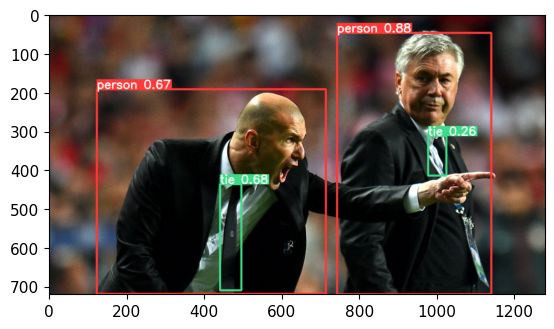

In [18]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))

In [22]:
results.xyxy

[tensor([[7.43290e+02, 4.83436e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75118e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

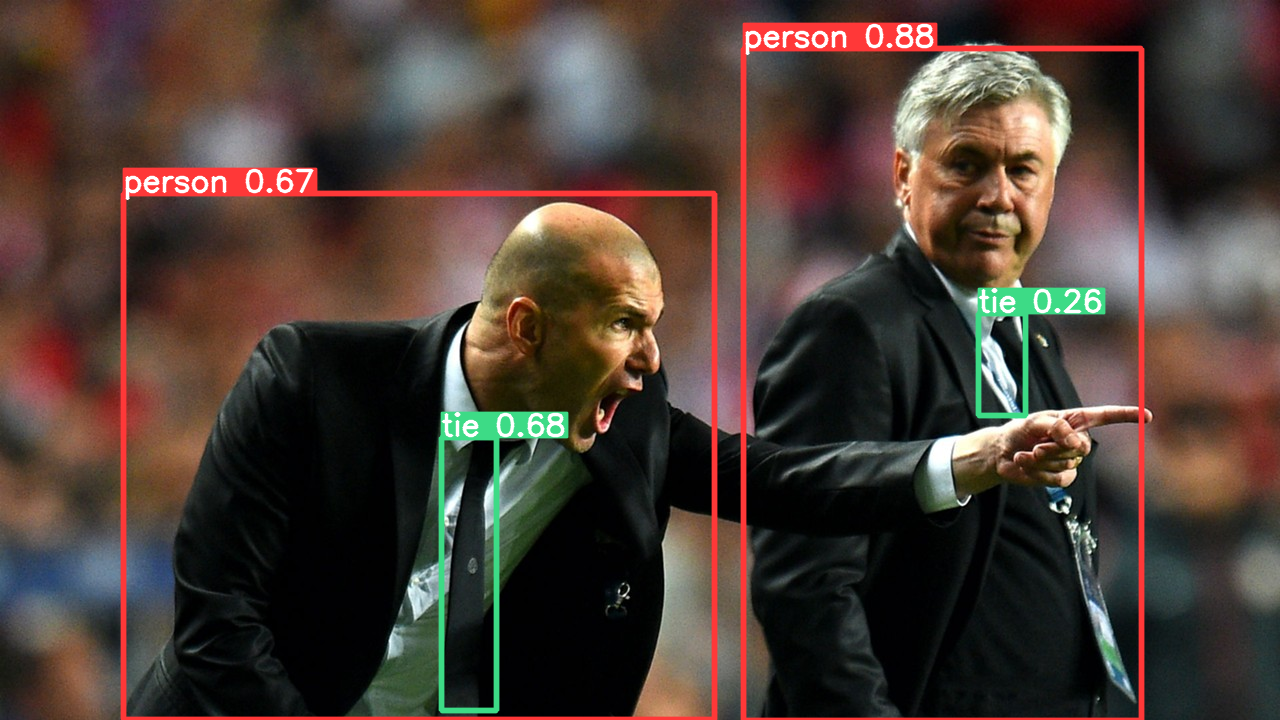

In [26]:
results.show()

In [28]:
img2 = 'https://motorlease.com/wp-content/uploads/2019/05/AdobeStock_47324734.jpeg'

In [30]:
results = model(img2)
results.print()

image 1/1: 936x1404 29 cars
Speed: 166.5ms pre-process, 105.9ms inference, 1.3ms NMS per image at shape (1, 3, 448, 640)


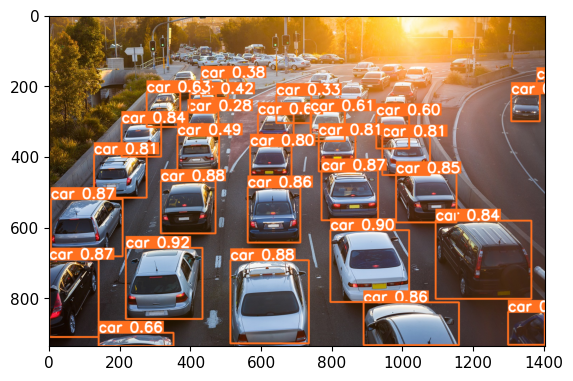

In [32]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))

Real-time detection

In [35]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO',np.squeeze(results.render()))
    if cv2.waitKey(10) &0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    

Train from scratch


In [38]:
import uuid  #unique identifier
import os
import time

In [40]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 30

In [42]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(labels))
    time.sleep(5)
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
    if cv2.waitKey(10) &0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [67]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

data/images/awake.64b33de2-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b33f40-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b33fae-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b33ffe-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b3404e-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b3409e-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b340ee-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b3415c-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b341b6-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b34206-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b34256-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b342a6-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b342f6-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b34346-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b34396-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b343dc-2c78-11ef-a1c2-1af0d19e66fb.jpg
data/images/awake.64b3442c-2c78-11ef-a1c2-1af0d19e66fb.j

In [44]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 1.82 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [50]:
!pip install pyqt5 lxml --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 13.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.3
    Uninstalling lxml-4.9.3:
      Successfully uninstalled lxml-4.9.3


In [63]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 20 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/Users/eram/Desktop/Jupyter': No such file or directory
YOLOv5 🚀 2024-6-17 Python-3.11.7 torch-2.3.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_l